# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
test_data = pd.merge(mouse_metadata, study_results, how= "outer", on= "Mouse ID")

# Display the data table for preview
test_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(test_data["Mouse ID"]))
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
for k,v in enumerate(test_data.duplicated(subset=['Mouse ID',"Timepoint"])):
    if v==True:
        print(test_data.iloc[k,0:2])

Mouse ID            g989
Drug Regimen    Propriva
Name: 587, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 589, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 591, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 593, dtype: object
Mouse ID            g989
Drug Regimen    Propriva
Name: 595, dtype: object


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = test_data[test_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [5]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(pd.unique(clean_data["Mouse ID"]))
new_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drugs_grouped = clean_data.groupby(["Drug Regimen"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_table = drugs_grouped["Tumor Volume (mm3)"].mean().reset_index(name="Mean Tumor Volume")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].median().reset_index(name="Median Tumor Volume"), on = "Drug Regimen", how = "outer")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].var().reset_index(name="Tumor Volume Variance"), on = "Drug Regimen", how = "outer") 

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].std().reset_index(name="Tumor Volume Deviation"), on = "Drug Regimen", how = "outer")

stat_table = pd.merge(stat_table, drugs_grouped["Tumor Volume (mm3)"].sem().reset_index(name="Tumor Volume SEM"), on = "Drug Regimen", how = "outer")

stat_table

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_statistics = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(func = ["mean","median","var","std","sem"])

aggregated_statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

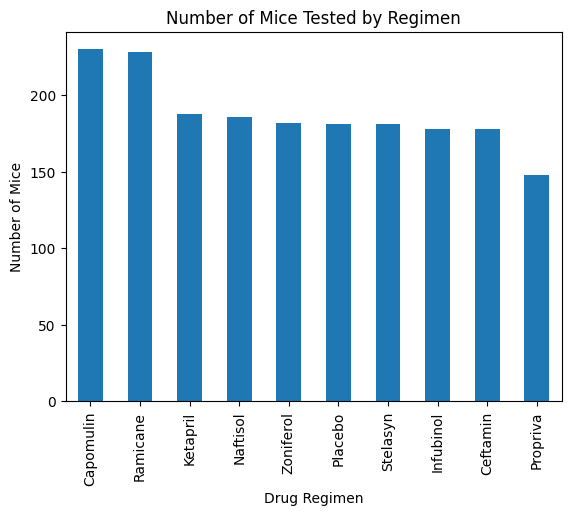

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_for_plotting = clean_data["Drug Regimen"].value_counts()

mice_for_plotting.plot.bar()

plt.title("Number of Mice Tested by Regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Mice")

plt.show()

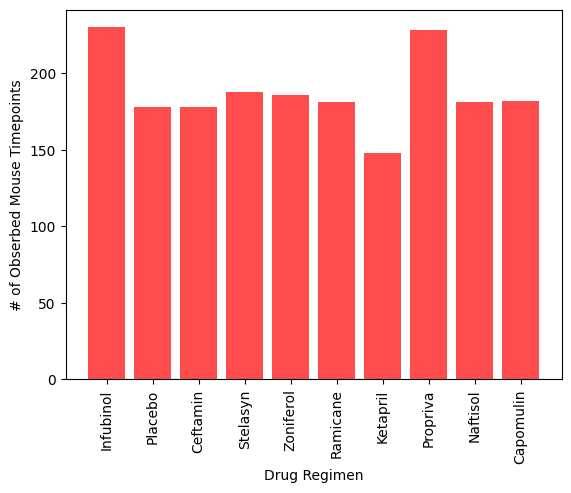

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_x = clean_data["Drug Regimen"].unique()

bar_y = clean_data.groupby(['Drug Regimen']).count()['Timepoint']

plt.xlabel("Drug Regimen")

plt.ylabel("# of Obserbed Mouse Timepoints")

plt.bar(bar_x, bar_y, color = "Red", alpha = 0.70, align = "center")

plt.xticks(clean_data["Drug Regimen"].unique(), rotation = 90)

plt.show()




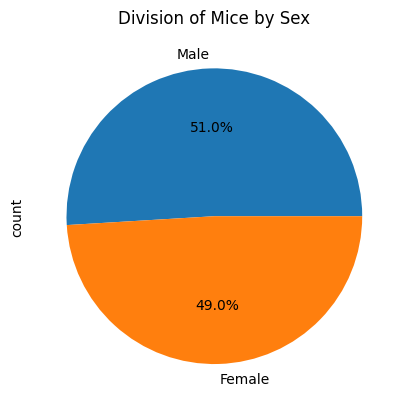

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_split = clean_data["Sex"].value_counts()

sex_split.plot.pie(autopct="%1.1f%%")

plt.title("Division of Mice by Sex")

plt.show()

([<matplotlib.patches.Wedge at 0x22494b43ef0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0%'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0%')])

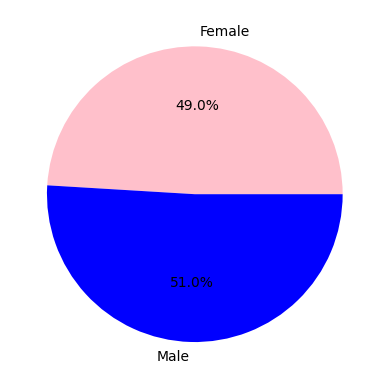

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_values = clean_data.groupby(["Sex"])["Mouse ID"].count().reset_index(name = "Counts by Sex")

pie_counts = sex_values["Counts by Sex"]

pie_labels = sex_values["Sex"]

colors = ["pink" , "blue"]

plt.pie(pie_counts,labels = pie_labels, colors = colors, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#regimen_lookups=clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|(clean_data["Drug Regimen"]=="Ramicane")|(clean_data["Drug Regimen"]=="Infubinol")|(clean_data["Drug Regimen"]=="Ceftamin") ,:]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Mouse ID"]).max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint[["Mouse ID","Timepoint"]], test_data, on = ["Mouse ID","Timepoint"], how = "left")

merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for regimen in treatments:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_each_drug = merged_data.loc[merged_data["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(mice_on_each_drug)
    
    # Determine outliers using upper and lower bounds
    upper_quartile = mice_on_each_drug.quantile(.75)

    lower_quartile = mice_on_each_drug.quantile(.25)

    iqr = upper_quartile - lower_quartile

([<matplotlib.axis.XTick at 0x2249aff9d90>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

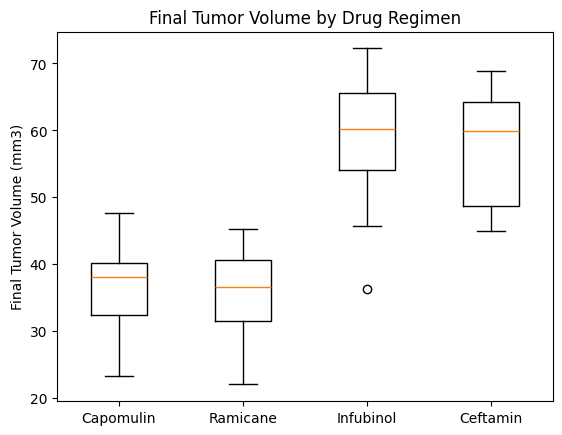

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)

plt.title("Final Tumor Volume by Drug Regimen")

plt.ylabel("Final Tumor Volume (mm3)")

plt.xticks(ticks = range(1,len(treatments)+1), labels = treatments)


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

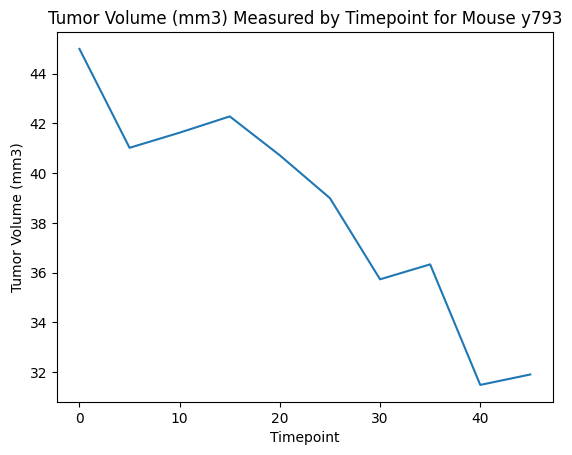

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

# chosen mouse is "y793"

chosen_mouse = clean_data.loc[clean_data["Mouse ID"] == "y793"]

time_point = chosen_mouse["Timepoint"]

tumor_volume_mm3 = chosen_mouse["Tumor Volume (mm3)"]

x = time_point

y = tumor_volume_mm3

plt.plot(x, y)

plt.title("Tumor Volume (mm3) Measured by Timepoint for Mouse y793")

plt.xlabel("Timepoint")

plt.ylabel("Tumor Volume (mm3)")



Text(0, 0.5, 'Average Tumor Volume (mm3)')

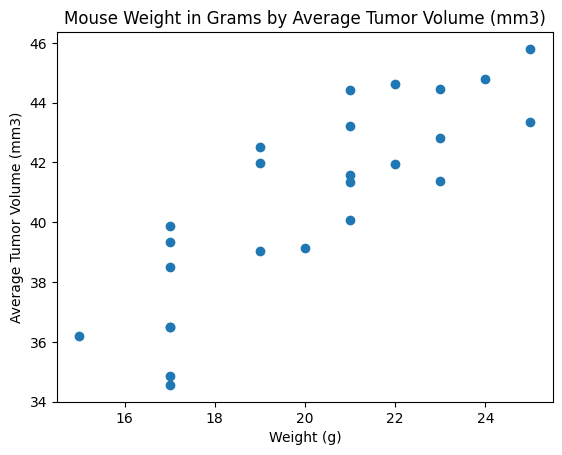

In [75]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mice_on_capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

average_tumor_volume = mice_on_capomulin["Tumor Volume (mm3)"].mean()

x = mice_on_capomulin["Weight (g)"].unique()

y = average_tumor_volume

plt.scatter(x, y)

plt.title("Mouse Weight in Grams by Average Tumor Volume (mm3)")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")
    

## Correlation and Regression

In [93]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# mice_on_capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

average_tumor_volume = mice_on_capomulin["Tumor Volume (mm3)"].mean()

x = mice_on_capomulin["Weight (g)"].unique()

y = average_tumor_volume

correlation_coefficient = st.pearsonr(x, average_tumor_volume).statistic

(slope, intercept,rvalue, pvalue, stderr) = st.linregress(x, average_tumor_volume)

regression_values = x * slope + intercept

plt.scatter(x, y)

plt.plot(x, regression_values, color = "red")

plt.title("Mouse Weight in Grams by Average Tumor Volume (mm3)")

plt.xlabel("Weight (g)")

plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient[0]}")


    


AttributeError: 'float' object has no attribute 'shape'